In [15]:
from google.colab import files
uploaded = files.upload()

Saving titanic.zip to titanic (7).zip


In [22]:
import pandas as pd
import zipfile  #  This is the missing import
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
# Open the ZIP file and load train.csv
with zipfile.ZipFile("titanic.zip") as z:
    with z.open("train.csv") as f:
        df = pd.read_csv(f)

In [24]:
# Data preprocessing
df.replace("\\N", pd.NA, inplace=True)
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Fare"] = pd.to_numeric(df["Fare"], errors="coerce")
df["Fare"] = df["Fare"].fillna(df["Fare"].median())
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])


In [25]:
# Select features and target
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X = df[features].copy()
y = df["Survived"]

In [26]:
# Encode categorical variables
X["Sex"] = LabelEncoder().fit_transform(X["Sex"])
X["Embarked"] = LabelEncoder().fit_transform(X["Embarked"])

In [27]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [28]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.776536312849162

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.71      0.77      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179



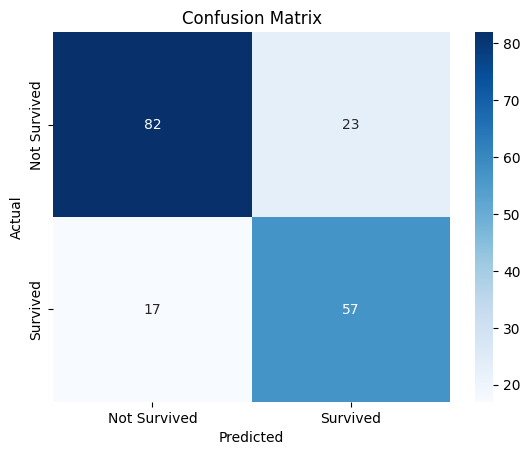

In [29]:
# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Survived", "Survived"],
            yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()